In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
boston_housing = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [3]:
X_train = boston_housing[0][0]#
y_train = boston_housing[0][1]

X_test = boston_housing[1][0]
y_test = boston_housing[1][1]

In [4]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [5]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [6]:
X_test.shape, y_test.shape

((102, 13), (102,))

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [8]:
X_train[0], X_test[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]),
 array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
        100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
         29.05  ]))

In [9]:
X_train_scaler[0], X_test_scaler[0]

(array([0.01378163, 0.        , 0.28152493, 0.        , 0.31481481,
        0.49980635, 0.91452111, 0.29719123, 0.13043478, 0.22753346,
        0.89361702, 1.        , 0.46881898]),
 array([0.20319551, 0.        , 0.64662757, 0.        , 0.60493827,
        0.55635167, 1.        , 0.07359588, 1.        , 0.91395793,
        0.80851064, 0.06790559, 0.75386313]))

In [10]:
tf.random.set_seed(42)

boston_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

boston_model_1.compile(loss= tf.keras.losses.mae,
                       optimizer= tf.keras.optimizers.SGD(),
                       metrics= ['mae'])

history1 = boston_model_1.fit(X_train_scaler, y_train, epochs=5)

Epoch 1/5
13/13 [==============================] - 3s 5ms/step - loss: 21.1718 - mae: 21.1718
Epoch 2/5
13/13 [==============================] - 0s 2ms/step - loss: 20.6913 - mae: 20.6913
Epoch 3/5
13/13 [==============================] - 0s 2ms/step - loss: 20.2102 - mae: 20.2102
Epoch 4/5
13/13 [==============================] - 0s 2ms/step - loss: 19.7294 - mae: 19.7294
Epoch 5/5
13/13 [==============================] - 0s 2ms/step - loss: 19.2482 - mae: 19.2482


Text(0.5, 0, 'Epochs')

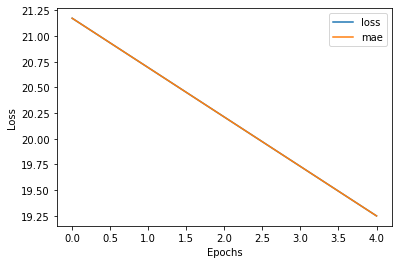

In [11]:
pd.DataFrame(history1.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [12]:
boston_model_1.evaluate(X_test_scaler, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 19.6435 - mae: 19.6435


[19.643537521362305, 19.643537521362305]

In [13]:
y_preds_1 = boston_model_1.predict(X_test_scaler)

4/4 [==============================] - 0s 3ms/step


In [14]:
y_test[:5], y_preds_1[:5]

(array([ 7.2, 18.8, 19. , 27. , 22.2]),
 array([[3.9651952],
        [3.7132106],
        [2.8640244],
        [3.5988545],
        [2.812118 ]], dtype=float32))

In [15]:
y_test.ndim, y_preds_1.ndim

(1, 2)

<AxesSubplot:>

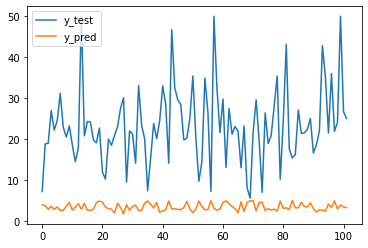

In [16]:
pd.DataFrame(
    {"y_test":y_test,
     "y_pred":tf.squeeze(y_preds_1)}
).plot()

In [17]:
tf.random.set_seed(42)

boston_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

boston_model_2.compile(loss= tf.keras.losses.mae,
                       optimizer= tf.keras.optimizers.SGD(),
                       metrics=['mae'])

history2=boston_model_2.fit(X_train_scaler, y_train, epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 22.8963 - mae: 22.8963
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 21.7190 - mae: 21.7190
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 20.4253 - mae: 20.4253
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 18.7238 - mae: 18.7238
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 16.2817 - mae: 16.2817
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 13.1561 - mae: 13.1561
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 10.3865 - mae: 10.3865
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 8.7418 - mae: 8.7418
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 7.9600 - mae: 7.9600
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 7.6193 - mae: 7.6193
Epoch 11/50
13/13 [==============================] - 0s

Text(0.5, 0, 'Epochs')

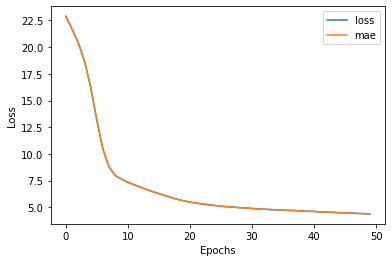

In [18]:
pd.DataFrame(history2.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [19]:
boston_model_2.evaluate(X_train_scaler,y_train)

13/13 [==============================] - 0s 2ms/step - loss: 4.3508 - mae: 4.3508


[4.350754737854004, 4.350754737854004]

In [20]:
y_preds_2= boston_model_2.predict(X_test_scaler)

4/4 [==============================] - 0s 2ms/step


<AxesSubplot:>

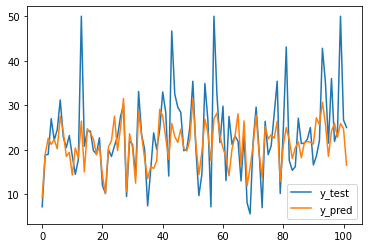

In [21]:
pd.DataFrame(
    {"y_test":y_test,
     "y_pred":tf.squeeze(y_preds_2)}
).plot()

In [22]:
tf.random.set_seed(42)

boston_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

boston_model_3.compile(loss= tf.keras.losses.mae,
                       optimizer= tf.keras.optimizers.Adam(lr=0.1),
                       metrics= ['mae'])

history3=boston_model_3.fit(X_train_scaler,y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 22.3323 - mae: 22.3323
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 21.7743 - mae: 21.7743
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 20.7203 - mae: 20.7203
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 18.6104 - mae: 18.6104
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 14.5159 - mae: 14.5159
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 9.9390 - mae: 9.9390
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 8.3940 - mae: 8.3940
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 7.7041 - mae: 7.7041
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 6.9138 - mae: 6.9138
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 6.2692 - mae: 6.2692
Epoch 11/100
13/13 [=============================

13/13 [==============================] - 0s 2ms/step - loss: 2.1739 - mae: 2.1739
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 2.1842 - mae: 2.1842
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 2.3241 - mae: 2.3241
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 2.1923 - mae: 2.1923
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 2.1367 - mae: 2.1367
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 2.1283 - mae: 2.1283
Epoch 93/100
13/13 [==============================] - 0s 2ms/step - loss: 2.1663 - mae: 2.1663
Epoch 94/100
13/13 [==============================] - 0s 2ms/step - loss: 2.1221 - mae: 2.1221
Epoch 95/100
13/13 [==============================] - 0s 2ms/step - loss: 2.1287 - mae: 2.1287
Epoch 96/100
13/13 [==============================] - 0s 2ms/step - loss: 2.0815 - mae: 2.0815
Epoch 97/100
13/13 [==============================] - 0s 2ms/st

Text(0.5, 0, 'Epochs')

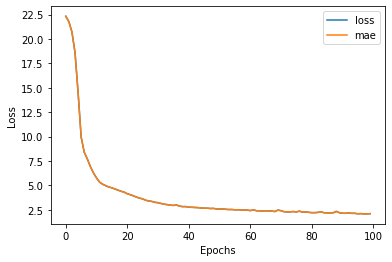

In [23]:
pd.DataFrame(history3.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [24]:
boston_model_3.evaluate(X_train_scaler, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 2.0445 - mae: 2.0445


[2.044529914855957, 2.044529914855957]

In [25]:
y_preds_3 = boston_model_3.predict(X_test_scaler)

4/4 [==============================] - 0s 2ms/step


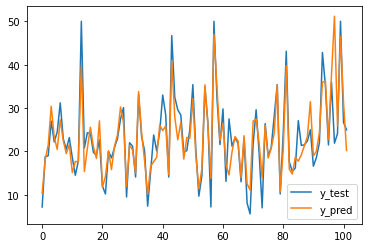

In [26]:
pd.DataFrame(
    {"y_test":y_test,
     "y_pred":tf.squeeze(y_preds_3)}
).plot();